# **SIMPLE SPAM CLASSIFICATION**

**DATASET DESCRIPTION:**

* **email - Email message.**
* **label - 1: Email is Spam/ 0: Email is not Spam**

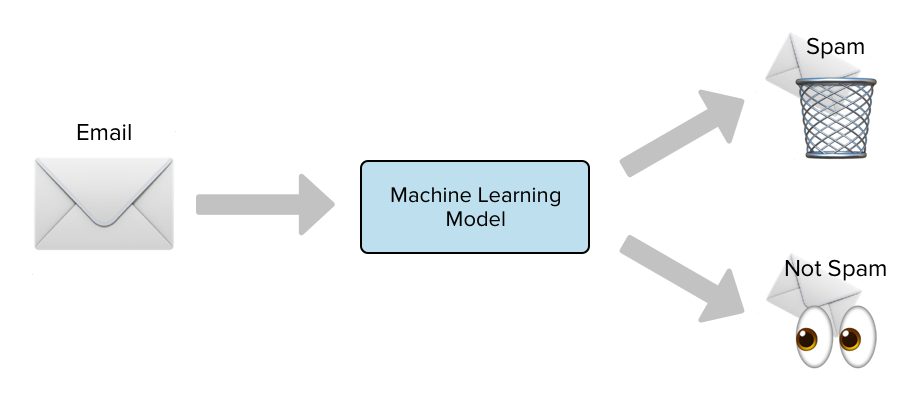

**IMPORTS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**IMPORTING THE DATA FILE**

In [2]:
df = pd.read_csv('/kaggle/input/spam-or-not-spam-dataset/spam_or_not_spam.csv')
# displaying the first five rows of the dataframe
df.head() 

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
# checking for number of rows and columns
df.shape 

(3000, 2)

In [4]:
# prints the information about the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [5]:
# description of the DataFrame
df.describe() 

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
# re-checking the presence of null value in column 'email'
df['email'].isnull().sum()

1

In [7]:
# filling the null value using fillna() method
df['email'].fillna(method = 'ffill', inplace = True)
df['email'].isnull().sum()

0

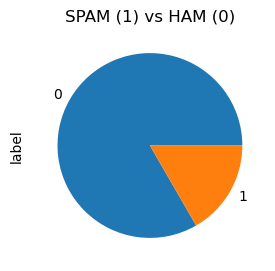

In [8]:
plt.figure(figsize=(3,3))
spam_ham = pd.value_counts(df['label'],sort = True)
spam_ham.plot(kind = 'pie')
plt.title('SPAM (1) vs HAM (0)')
plt.show()

**SPLITTING X and y**

In [9]:
X = df.email
y = df.label

**SPLITTING TRAIN AND TEST DATA**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**EXTRACTING FEATURES**

>**TOKENIZING**

In [11]:
# CountVectorizer() randomly assigns number to each words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

# **MODELLING**

>**SUPPORT VECTOR MACHINE**

>*   **Support Vector Machine (SVM) algorithm is a linear model for Classification and Regression.**
>*   **It creates a hyperplane / line which separates the data into classes.**
>*   **Can solve both Linear and Non-Linear problems.**


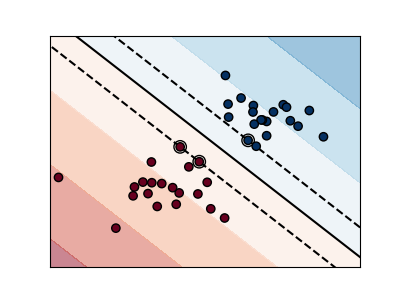

In [12]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [13]:
y_pred = model.predict(X_test)

In [14]:
# ACCURACY
print(model.score(X_test, y_test))

0.935


In [15]:
# Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       499
           1       0.98      0.62      0.76       101

    accuracy                           0.94       600
   macro avg       0.96      0.81      0.86       600
weighted avg       0.94      0.94      0.93       600



[[498   1]
 [ 38  63]]


<AxesSubplot:title={'center':'Confusion Matrix Visualization'}>

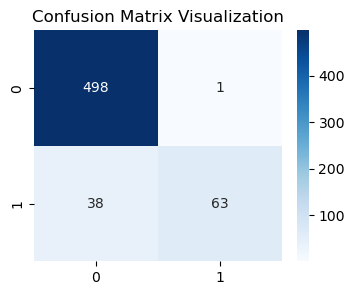

In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix Visualization')
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')